In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

import random

In [3]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "grid.linewidth": 0.2})

plt.rcParams['figure.figsize'] = 14, 8

# Raw Data From Keras

In [46]:
raw_data = '''
Epoch 1/50
6502/6503 [============================>.] - ETA: 0s - loss: 2.1033 - acc: 0.4008Epoch 00001: val_loss improved from inf to 1.69932, saving model to models/ethereum.h5
6503/6503 [==============================] - 1043s 160ms/step - loss: 2.1032 - acc: 0.4008 - val_loss: 1.6993 - val_acc: 0.5093
Epoch 2/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.7002 - acc: 0.5050Epoch 00002: val_loss improved from 1.69932 to 1.54410, saving model to models/ethereum.h5
6503/6503 [==============================] - 794s 122ms/step - loss: 1.7002 - acc: 0.5050 - val_loss: 1.5441 - val_acc: 0.5499
Epoch 3/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5978 - acc: 0.5315Epoch 00003: val_loss improved from 1.54410 to 1.48191, saving model to models/ethereum.h5
6503/6503 [==============================] - 988s 152ms/step - loss: 1.5977 - acc: 0.5315 - val_loss: 1.4819 - val_acc: 0.5666
Epoch 4/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5458 - acc: 0.5445Epoch 00004: val_loss improved from 1.48191 to 1.44457, saving model to models/ethereum.h5
6503/6503 [==============================] - 1051s 162ms/step - loss: 1.5458 - acc: 0.5446 - val_loss: 1.4446 - val_acc: 0.5734
Epoch 5/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5118 - acc: 0.5533Epoch 00005: val_loss improved from 1.44457 to 1.42305, saving model to models/ethereum.h5
6503/6503 [==============================] - 1012s 156ms/step - loss: 1.5117 - acc: 0.5533 - val_loss: 1.4230 - val_acc: 0.5803
Epoch 6/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4888 - acc: 0.5589Epoch 00006: val_loss improved from 1.42305 to 1.40166, saving model to models/ethereum.h5
6503/6503 [==============================] - 1008s 155ms/step - loss: 1.4888 - acc: 0.5589 - val_loss: 1.4017 - val_acc: 0.5854
Epoch 7/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4730 - acc: 0.5626Epoch 00007: val_loss improved from 1.40166 to 1.38922, saving model to models/ethereum.h5
6503/6503 [==============================] - 1015s 156ms/step - loss: 1.4730 - acc: 0.5626 - val_loss: 1.3892 - val_acc: 0.5889
Epoch 8/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4585 - acc: 0.5664Epoch 00008: val_loss improved from 1.38922 to 1.37852, saving model to models/ethereum.h5
6503/6503 [==============================] - 1026s 158ms/step - loss: 1.4585 - acc: 0.5664 - val_loss: 1.3785 - val_acc: 0.5912
Epoch 9/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4485 - acc: 0.5689Epoch 00009: val_loss improved from 1.37852 to 1.37210, saving model to models/ethereum.h5
6503/6503 [==============================] - 1030s 158ms/step - loss: 1.4485 - acc: 0.5689 - val_loss: 1.3721 - val_acc: 0.5934
Epoch 10/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4392 - acc: 0.5709Epoch 00010: val_loss improved from 1.37210 to 1.36497, saving model to models/ethereum.h5
6503/6503 [==============================] - 1042s 160ms/step - loss: 1.4392 - acc: 0.5709 - val_loss: 1.3650 - val_acc: 0.5951
Epoch 11/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4305 - acc: 0.5730Epoch 00011: val_loss improved from 1.36497 to 1.36040, saving model to models/ethereum.h5
6503/6503 [==============================] - 1329s 204ms/step - loss: 1.4305 - acc: 0.5730 - val_loss: 1.3604 - val_acc: 0.5951
Epoch 12/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4248 - acc: 0.5748Epoch 00012: val_loss improved from 1.36040 to 1.35385, saving model to models/ethereum.h5
6503/6503 [==============================] - 1086s 167ms/step - loss: 1.4248 - acc: 0.5748 - val_loss: 1.3538 - val_acc: 0.5981
Epoch 13/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4178 - acc: 0.5764Epoch 00013: val_loss improved from 1.35385 to 1.34592, saving model to models/ethereum.h5
6503/6503 [==============================] - 1131s 174ms/step - loss: 1.4178 - acc: 0.5764 - val_loss: 1.3459 - val_acc: 0.5994
Epoch 14/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4141 - acc: 0.5773Epoch 00014: val_loss improved from 1.34592 to 1.34136, saving model to models/ethereum.h5
6503/6503 [==============================] - 1027s 158ms/step - loss: 1.4141 - acc: 0.5773 - val_loss: 1.3414 - val_acc: 0.6002
Epoch 15/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4089 - acc: 0.5783Epoch 00015: val_loss improved from 1.34136 to 1.34120, saving model to models/ethereum.h5
6503/6503 [==============================] - 883s 136ms/step - loss: 1.4089 - acc: 0.5783 - val_loss: 1.3412 - val_acc: 0.6002
Epoch 16/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4047 - acc: 0.5792Epoch 00016: val_loss improved from 1.34120 to 1.33594, saving model to models/ethereum.h5
6503/6503 [==============================] - 912s 140ms/step - loss: 1.4047 - acc: 0.5792 - val_loss: 1.3359 - val_acc: 0.6023
Epoch 17/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4010 - acc: 0.5804Epoch 00017: val_loss improved from 1.33594 to 1.33460, saving model to models/ethereum.h5
6503/6503 [==============================] - 1074s 165ms/step - loss: 1.4010 - acc: 0.5804 - val_loss: 1.3346 - val_acc: 0.6024
Epoch 18/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3974 - acc: 0.5817Epoch 00018: val_loss improved from 1.33460 to 1.33016, saving model to models/ethereum.h5
6503/6503 [==============================] - 1081s 166ms/step - loss: 1.3974 - acc: 0.5817 - val_loss: 1.3302 - val_acc: 0.6029
Epoch 19/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3952 - acc: 0.5820Epoch 00019: val_loss improved from 1.33016 to 1.32863, saving model to models/ethereum.h5
6503/6503 [==============================] - 1109s 171ms/step - loss: 1.3952 - acc: 0.5821 - val_loss: 1.3286 - val_acc: 0.6045
Epoch 20/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3929 - acc: 0.5828Epoch 00020: val_loss improved from 1.32863 to 1.32789, saving model to models/ethereum.h5
6503/6503 [==============================] - 881s 135ms/step - loss: 1.3928 - acc: 0.5828 - val_loss: 1.3279 - val_acc: 0.6043
Epoch 21/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3893 - acc: 0.5839Epoch 00021: val_loss improved from 1.32789 to 1.32484, saving model to models/ethereum.h5
6503/6503 [==============================] - 842s 129ms/step - loss: 1.3893 - acc: 0.5839 - val_loss: 1.3248 - val_acc: 0.6053
Epoch 22/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3859 - acc: 0.5844Epoch 00022: val_loss improved from 1.32484 to 1.32237, saving model to models/ethereum.h5
6503/6503 [==============================] - 798s 123ms/step - loss: 1.3859 - acc: 0.5844 - val_loss: 1.3224 - val_acc: 0.6058
Epoch 23/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3843 - acc: 0.5850Epoch 00023: val_loss improved from 1.32237 to 1.32188, saving model to models/ethereum.h5
6503/6503 [==============================] - 796s 122ms/step - loss: 1.3843 - acc: 0.5850 - val_loss: 1.3219 - val_acc: 0.6060
Epoch 24/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3815 - acc: 0.5860Epoch 00024: val_loss improved from 1.32188 to 1.32152, saving model to models/ethereum.h5
6503/6503 [==============================] - 863s 133ms/step - loss: 1.3815 - acc: 0.5860 - val_loss: 1.3215 - val_acc: 0.6065
Epoch 25/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3797 - acc: 0.5858Epoch 00025: val_loss improved from 1.32152 to 1.31619, saving model to models/ethereum.h5
6503/6503 [==============================] - 1007s 155ms/step - loss: 1.3797 - acc: 0.5858 - val_loss: 1.3162 - val_acc: 0.6068
Epoch 26/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3777 - acc: 0.5869Epoch 00026: val_loss improved from 1.31619 to 1.31567, saving model to models/ethereum.h5
6503/6503 [==============================] - 1002s 154ms/step - loss: 1.3777 - acc: 0.5869 - val_loss: 1.3157 - val_acc: 0.6082
Epoch 27/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3768 - acc: 0.5873Epoch 00027: val_loss improved from 1.31567 to 1.31504, saving model to models/ethereum.h5
6503/6503 [==============================] - 1007s 155ms/step - loss: 1.3768 - acc: 0.5873 - val_loss: 1.3150 - val_acc: 0.6079
Epoch 28/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3751 - acc: 0.5875Epoch 00028: val_loss improved from 1.31504 to 1.31503, saving model to models/ethereum.h5
6503/6503 [==============================] - 1002s 154ms/step - loss: 1.3751 - acc: 0.5875 - val_loss: 1.3150 - val_acc: 0.6077
Epoch 29/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3736 - acc: 0.5880Epoch 00029: val_loss improved from 1.31503 to 1.31439, saving model to models/ethereum.h5
6503/6503 [==============================] - 1006s 155ms/step - loss: 1.3736 - acc: 0.5880 - val_loss: 1.3144 - val_acc: 0.6079
Epoch 30/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3705 - acc: 0.5889Epoch 00030: val_loss improved from 1.31439 to 1.31203, saving model to models/ethereum.h5
6503/6503 [==============================] - 1004s 154ms/step - loss: 1.3705 - acc: 0.5889 - val_loss: 1.3120 - val_acc: 0.6085
Epoch 31/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3703 - acc: 0.5884Epoch 00031: val_loss improved from 1.31203 to 1.30941, saving model to models/ethereum.h5
6503/6503 [==============================] - 1003s 154ms/step - loss: 1.3703 - acc: 0.5884 - val_loss: 1.3094 - val_acc: 0.6099
Epoch 32/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3679 - acc: 0.5894Epoch 00032: val_loss did not improve
6503/6503 [==============================] - 1001s 154ms/step - loss: 1.3679 - acc: 0.5894 - val_loss: 1.3113 - val_acc: 0.6090
Epoch 33/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3670 - acc: 0.5897Epoch 00033: val_loss improved from 1.30941 to 1.30745, saving model to models/ethereum.h5
6503/6503 [==============================] - 950s 146ms/step - loss: 1.3670 - acc: 0.5897 - val_loss: 1.3075 - val_acc: 0.6100
Epoch 34/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3662 - acc: 0.5903Epoch 00034: val_loss improved from 1.30745 to 1.30741, saving model to models/ethereum.h5
6503/6503 [==============================] - 866s 133ms/step - loss: 1.3662 - acc: 0.5903 - val_loss: 1.3074 - val_acc: 0.6107
Epoch 35/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3644 - acc: 0.5901Epoch 00035: val_loss improved from 1.30741 to 1.30653, saving model to models/ethereum.h5
6503/6503 [==============================] - 855s 131ms/step - loss: 1.3644 - acc: 0.5901 - val_loss: 1.3065 - val_acc: 0.6102
Epoch 36/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3633 - acc: 0.5910Epoch 00036: val_loss did not improve
6503/6503 [==============================] - 896s 138ms/step - loss: 1.3633 - acc: 0.5910 - val_loss: 1.3071 - val_acc: 0.6112
'''

In [47]:
def parse_data(data):
    lines = [
        [datum.split(': ')[-1] for datum in l if not l[0].startswith('Epoch')]
            for l in
        [line.split(' - ') for line in data.splitlines() if line]
    ]
    if all(['=' in i[0] for i in lines if i]):
        lines = [i[2:] for i in lines if i and not 'improve' in i[3]]
    return pd.DataFrame(lines, columns=['loss', 'acc', 'val_loss', 'val_acc']).applymap(float)

def plot_curves(cols, title='Network Training Progress', xlabel='Epochs', ylabel='Curves', **kwargs):
    ax = df[cols].plot(figsize=(14, 8),
                       title=title,
                       kind='line',
                       colormap='Pastel2',
                       markersize=14,
                       marker='.',
                       **kwargs)
    ax.set(xlabel=ylabel, ylabel=ylabel)
    sns.despine(ax=ax);

In [48]:
df = parse_data(raw_data)

# Plots

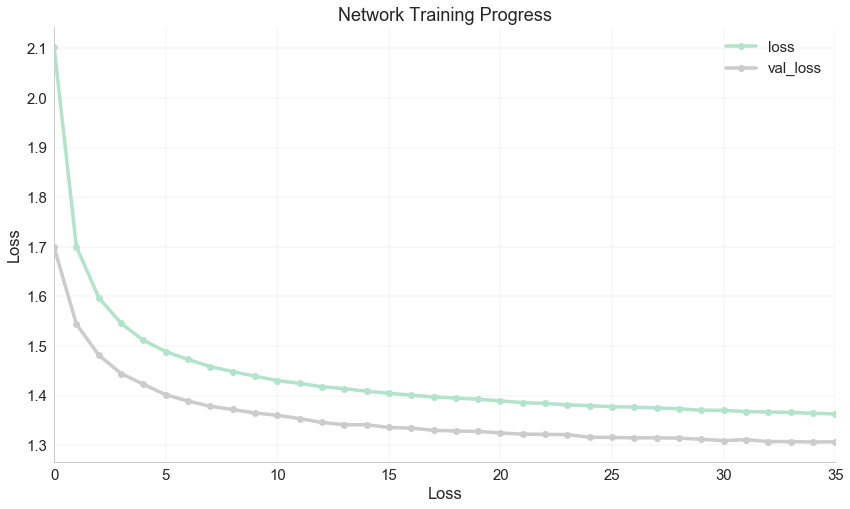

In [49]:
plot_curves(['loss', 'val_loss'], ylabel='Loss')

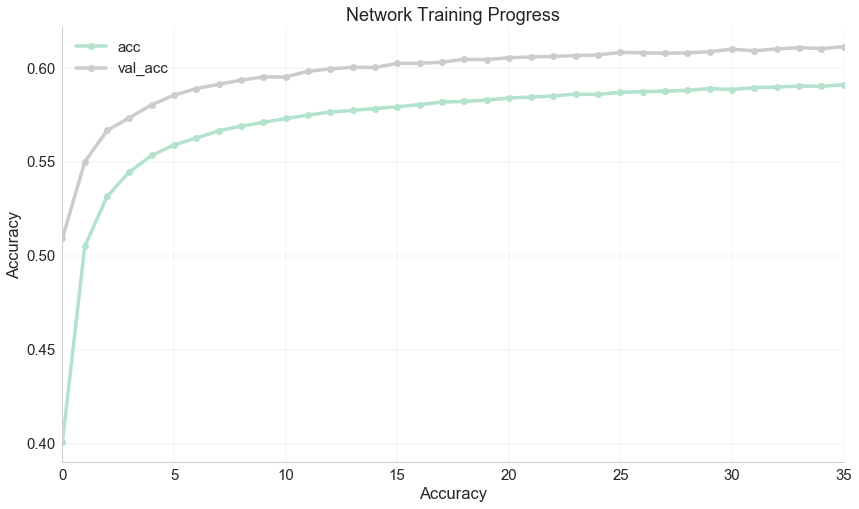

In [51]:
plot_curves(['acc', 'val_acc'], ylabel='Accuracy')

# Curve Fit the Loss Function

## Function

$$
f(x) = Ae^{-Bx} + C
$$

In [52]:
def f(x, a, b, c):
    return a * np.exp(-b * x) + c

## Fit the Parameters

In [53]:
x = np.arange(len(df.val_loss.values))
y = df.val_loss.values

(a, b, c), err = sp.optimize.curve_fit(f,  x,  y)

## Check Error

In [54]:
print(a, b, c)
print(err)

0.339132541892 0.293552377943 1.32206424581
[[  1.59718950e-04   1.18748709e-04  -4.55530400e-06]
 [  1.18748709e-04   4.08690882e-04   3.13793159e-05]
 [ -4.55530400e-06   3.13793159e-05   1.02421698e-05]]


f(x) = 0.339e^-0.294x + 1.322


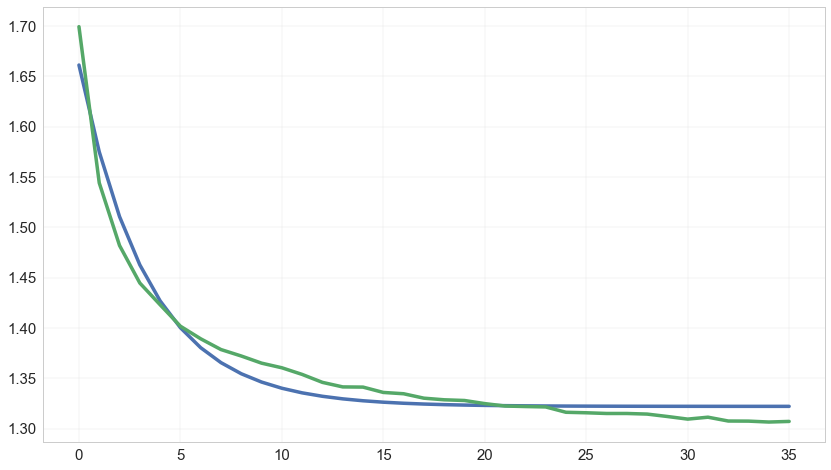

In [55]:
X = np.arange(0, 100)

print('f(x) = {a:.3f}e^-{b:.3f}x + {c:.3f}'.format(a=a,b=b,c=c))
plt.plot(x, f(x, a, b, c))
plt.plot(x, y);

# Check Where Validation Loss Improved

In [56]:
val_loss_diff = pd.Series(df.val_loss.values[:-1] - df.val_loss.values[1:])

val_loss_diff

0     0.1552
1     0.0622
2     0.0373
3     0.0216
4     0.0213
5     0.0125
6     0.0107
7     0.0064
8     0.0071
9     0.0046
10    0.0066
11    0.0079
12    0.0045
13    0.0002
14    0.0053
15    0.0013
16    0.0044
17    0.0016
18    0.0007
19    0.0031
20    0.0024
21    0.0005
22    0.0004
23    0.0053
24    0.0005
25    0.0007
26    0.0000
27    0.0006
28    0.0024
29    0.0026
30   -0.0019
31    0.0038
32    0.0001
33    0.0009
34   -0.0006
dtype: float64

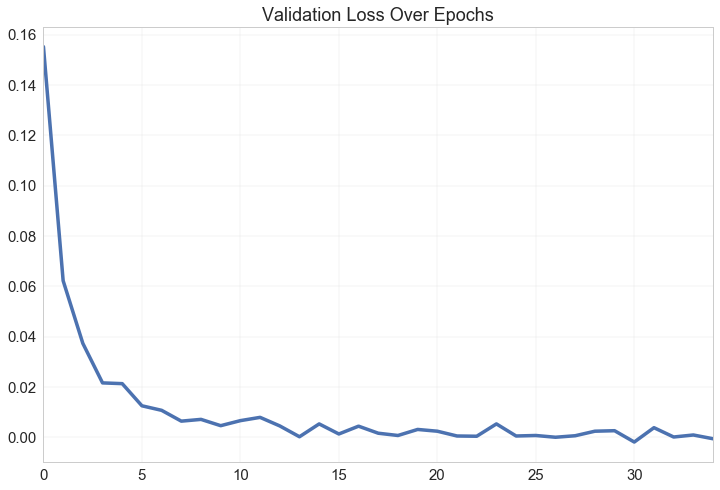

In [57]:
val_loss_diff.plot(figsize=(12,8),
                   title='Validation Loss Over Epochs');